<div align='center'><font size="6">Natural Language Processing(Deep Learning Model)</font></div>

<hr>


## Dataset
The datasets contains a set of tweets which have been divided into a training and a test set. The training set contains a target column identifying whether the tweet pertains to Violence or not.

The job is to create a DL model to predict whether the test set tweets belong to a violence or not, in the form of 1 or 0.This is a classic case of a Binary Classification problem. 

In [ ]:
#Installing Necessary Modules

pip install nlp
pip install tensorflow

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nlp
import random

## Loading Datasets and EDA

In [2]:
train=pd.read_csv("train_prj.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test=pd.read_csv("test_prj.csv")

In [5]:
#Missing values in training set
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
#no of records and columns in training data
train.shape

(31962, 3)

* ** Distribution of the label Column**

We have to predict whether a given tweet is about a violence one or not. - If so, predict a 1. If not, predict a 0.

In [7]:
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [8]:
#Function to get tweets and labels in seperate lists
def get_tweet(data):
    tweets=data['tweet']
    labels=data['label']
    return tweets,labels

In [9]:
tweets,labels=get_tweet(train)

In [10]:
print(tweets[50],":",labels[50])

#abc2020 getting ready 2 remove the victums frm #pulseclub #prayfororlando   : 0


## TOKENISATION

Tokenization is a process that splits an input sequence into so-called tokens where the tokens can be a word, sentence, paragraph etc. Base upon the type of tokens we want, tokenization can be of various types.

In [12]:
tokenizer=Tokenizer(num_words=10000,oov_token="<UNK>")#Change the num_words acc to your need
tokenizer.fit_on_texts(tweets)

In [13]:
#Convering tokens to a vector of sequences for a specific tweet.
print(tweets[50])
tokenizer.texts_to_sequences([tweets[50]])

#abc2020 getting ready 2 remove the victums frm #pulseclub #prayfororlando  


[[1, 206, 172, 78, 2760, 3, 1, 2761, 1, 561]]

## Padding and Truncation

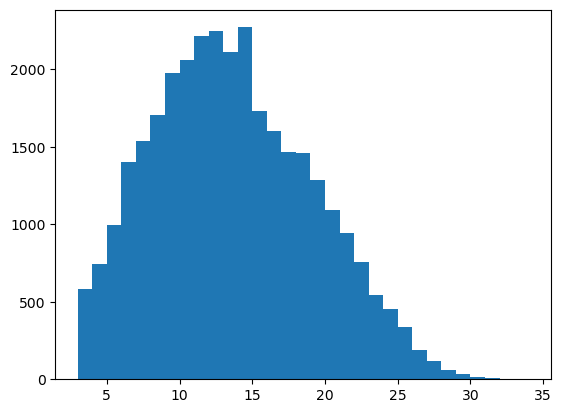

In [14]:
#checking the length of each words in the tweet(Among the selected limit).
lengths=[len(s.split()) for s in tweets]
plt.hist(lengths,bins =len(set(lengths)))
plt.show()

In [15]:
maxlen=26#change the value acc to your need


In [16]:
#Function for Convering tokens to a vector of Padded sequences for all the tweets in the Data-Set.
def get_sequences(tokenizer,tweets):
    sequences=tokenizer.texts_to_sequences(tweets)
    padded_sequences=pad_sequences(sequences,truncating="post",padding='post',maxlen=maxlen)#Creating Padded Sequence with help of truncation.
    return padded_sequences

In [17]:
padded_train_sequences=get_sequences(tokenizer,tweets)

In [18]:
padded_train_sequences[50]

array([   1,  206,  172,   78, 2760,    3,    1, 2761,    1,  561,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0])

In [ ]:
#Each and every tweets in training data set will be padded with length 26.
lengths=[len(i) for i in padded_train_sequences]
plt.hist(lengths)
plt.show()

In [ ]:
#class_to_label={"Non-violence":0,"Violence":1}
#class_to_label

In [19]:
#Converting numeric representation to lexical representation
label_to_class={0:"Non-violence",1:"Violence"}
label_to_class

{0: 'Non-violence', 1: 'Violence'}

In [20]:
#labels_ids=lambda labels:np.array([class_to_label.get(x) for x in labels])

ids_labels=lambda ids:np.array([label_to_class.get(x) for x in ids])#Function to apply the conversion to the whole data-set.

In [21]:
train_labels=ids_labels(labels)#Function call is done here
train_labels[13]

'Violence'

In [ ]:
train.loc[train['label']==1,:][:5]#To get Violent tweet from training set, for evaluating the prediction is made correctly or not.
train.loc[train['label']==0,:][:5]#To get Violent tweet from training set, for evaluating the prediction is made correctly or not.

## Model Creation

* Sequential model is being created with embedding layer in first place since we have used padded sequence.
* Then two Bi-directional layers are used along with LSTM activation function.
* At last a dense layer is used as output layer to get the output sequences of the hideen input layers, used above and to give the correct classification of the tweet as either 0 or 1.The activation function used here is SoftMax.

In [22]:
model=tf.keras.Sequential([tf.keras.layers.Embedding(10000,16),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                           tf.keras.layers.Dense(2,activation='softmax')])
model.compile(
    loss='sparse_categorical_crossentropy',#To get the loss and cost value
    optimizer='adam',#To get the best-fit equation(approximation)
    metrics=['accuracy']#To evaluate the model
)
                           

In [23]:
model.summary()#It will return the summary of the model we have built.Due to version compatability the output shape and parameters is not returned.
               #But the model has been built successfully with the credintials we gave.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##  Model Training and calculating the accuracy

* Here we are building the model and evaluating the model with 10 epochs.One epoch means one front_propagation and back-propagation.
* The sequence converted from tweets and labels, associated with the tweets are used as Validation data.We have used callback argument to initialise the evaluation metrics and the early stopping criteria.
* Early stopping is used so that the epoch will stop automatically once the model attains the highest accuracy.No need for completing all the epochs since we have attained the highest accuracy.

In [25]:
#tweets,labels=get_tweet(train)
seqquences=get_sequences(tokenizer,tweets)#Converting the tweeets to the required format before evaluation and building the model.
#train_labels=ids_labels(labels)

In [30]:
m=model.fit(padded_train_sequences,labels,validation_data=(seqquences,labels),
            epochs=10,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')])

Epoch 1/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.9314 - loss: 0.2365 - val_accuracy: 0.9738 - val_loss: 0.0773
Epoch 2/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9715 - loss: 0.0779 - val_accuracy: 0.9818 - val_loss: 0.0511
Epoch 3/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9820 - loss: 0.0522 - val_accuracy: 0.9911 - val_loss: 0.0307
Epoch 4/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.9882 - loss: 0.0339 - val_accuracy: 0.9935 - val_loss: 0.0228
Epoch 5/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 37s 32ms/step - accuracy: 0.9912 - loss: 0.0261 - val_accuracy: 0.9952 - val_loss: 0.0163
Epoch 6/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9958 - val_loss: 0.0131
Epoch 7/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9970 - val_loss: 0.0099
Epoch 8/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.9961 - loss: 0.0123 - 

## Evaluating the model prediction

In [ ]:
test_tweets,test_labels=get_tweet(test)
test_sequences=get_sequences(tokenizer,test_tweets)#Since the test data given here has no label.We are using the training data itself.
                                                   #To know whether the model is working fine or not with the help of Actual label and predicted label.

In [32]:
for _ in range(5):#loop to get five random tweet and their padded sequence.
    i=random.randint(0,len(labels)-1)
    print("Tweet :",tweets[i]," ==> label: ",labels[i])
    p=model.predict(np.expand_dims(seqquences[i],axis=0))[0]
    pred_class=label_to_class[np.argmax(p).astype('uint8')]
    print("Prediction: ",pred_class)

Tweet : #pray for #orlando. so   this continues to happenððð   ==> label:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction:  Non-violence
Tweet : a friend i've loved twenty years proved the true, greedy/unempathic essence of himself today, which i can no longer deny or excuse.    ==> label:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction:  Non-violence
Tweet : ma fleurette ð¯ð #instaboy#instaman#sefie#septum#friend #smiles#blackandwhite   ==> label:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction:  Non-violence
Tweet : i deserve this! i worked hard this week ð #workworkwork #gelato #haagendazs #choclatelover     ==> label:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction:  Non-violence
Tweet :   #pissed @user @user #strikes want money back !!! missing @user gutted ! so ur shit out a holes.... #engrus #twats  ==> label:  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction:  Non-violence


In the below cell,we can give a single tweet from the training data set that is pre-processed to evaluate the model prediction.

In [33]:
print("Tweet :",tweets[13]," ==> label: ",labels[13])#Give the index of tweet and label here
p=model.predict(np.expand_dims(seqquences[13],axis=0))[0]#The padded sequence of the tweet will be given here and prediction is done.
pred_class=label_to_class[np.argmax(p).astype('uint8')]
print("Prediction: ",pred_class)

Tweet : @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot    ==> label:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction:  Violence
